Name: Akshay Santoshi
<br>
Roll No: CS21BTECH11012

<b>QUESTION 2(a)</b>

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.transforms as transforms
import torchvision.datasets as datasets
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader

In [2]:
# Load MNIST dataset
transform = transforms.Compose([transforms.ToTensor()])
train_dataset = datasets.MNIST(root="./data", train=True, transform=transform, download=True)
test_dataset = datasets.MNIST(root="./data", train=False, transform=transform, download=True)
train_loader = DataLoader(train_dataset, batch_size=128, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=128, shuffle=False)

In [3]:
# Define the Convolutional Autoencoder (CAE) Model 1
class CAE_Model1(nn.Module):
    def __init__(self):
        super(CAE_Model1, self).__init__()
        
        # Encoder
        self.encoder = nn.Sequential(
            nn.Conv2d(1, 16, 3, padding=1),  
            nn.ReLU(),
            nn.MaxPool2d(2, 2),
            nn.Conv2d(16, 4, 3, padding=1),  
            nn.ReLU(),
            nn.MaxPool2d(2, 2)
        )
        
        # Decoder
        self.decoder = nn.Sequential(
            nn.ConvTranspose2d(4, 16, 2, stride=2),   
            nn.ReLU(),
            nn.ConvTranspose2d(16, 1, 2, stride=2),   
            nn.Sigmoid()
        )
        
    def forward(self, x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x

In [4]:
# Define the Convolutional Autoencoder (CAE) Model 2
class CAE_Model2(nn.Module):
    def __init__(self):
        super(CAE_Model2, self).__init__()
        
        # Encoder
        self.encoder = nn.Sequential(
            nn.Conv2d(1, 32, 3, padding=1), 
            nn.ReLU(),
            nn.MaxPool2d(2, 2),
            nn.Conv2d(32, 64, 3, padding=1),  
            nn.ReLU(),
            nn.MaxPool2d(2, 2)
            
        )
        
        # Decoder
        self.decoder = nn.Sequential(    
            nn.Upsample(scale_factor=2, mode='nearest'),
            nn.Conv2d(64, 32, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.Upsample(scale_factor=2, mode='nearest'),
            nn.Conv2d(32, 1, kernel_size=3, padding=1),
            nn.Sigmoid()
        )
        
    def forward(self, x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x

In [5]:
# Define the Convolutional Autoencoder (CAE) Model 3 
class CAE_Model3(nn.Module):
    def __init__(self):
        super(CAE_Model3, self).__init__()

        self.encoder = nn.Sequential(
            # Encoder: 
            nn.Conv2d(1, 16, kernel_size=3, padding=1),
            nn.LeakyReLU(negative_slope=0.2),
            nn.MaxPool2d(2, 2),

            nn.Conv2d(16, 32, kernel_size=3, padding=1),
            nn.LeakyReLU(negative_slope=0.2),
            nn.MaxPool2d(2, 2)
        )

        self.decoder = nn.Sequential(
            # Decoder: 
            nn.ConvTranspose2d(32, 16, kernel_size=2, stride=2),
            nn.BatchNorm2d(16),
            nn.LeakyReLU(negative_slope=0.2),

            nn.ConvTranspose2d(16, 1, kernel_size=2, stride=2),
            nn.Sigmoid()  
        )
        
    def forward(self, x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x

In [6]:
# Train and evaluate models
models = {  "CAE_Model 1": CAE_Model1(), "CAE_Model 2": CAE_Model2(), "CAE_Model 3": CAE_Model3()  }
criterion = nn.MSELoss()

In [7]:
for name, model in models.items():
    optimizer = optim.Adam(model.parameters(), lr=0.001)
    model.train()
    print(f"Training {name}...")
    for epoch in range(6):
        running_loss = 0.0
        for images, _ in train_loader:
            optimizer.zero_grad()
            outputs = model(images)
            loss = criterion(outputs, images)
            loss.backward()
            optimizer.step()
            running_loss += loss.item()
        print(f"Epoch [{epoch+1}/6], Loss: {running_loss/len(train_loader):.4f}")

Training CAE_Model 1...
Epoch [1/6], Loss: 0.0813
Epoch [2/6], Loss: 0.0191
Epoch [3/6], Loss: 0.0169
Epoch [4/6], Loss: 0.0158
Epoch [5/6], Loss: 0.0148
Epoch [6/6], Loss: 0.0139
Training CAE_Model 2...
Epoch [1/6], Loss: 0.1140
Epoch [2/6], Loss: 0.1120
Epoch [3/6], Loss: 0.1120
Epoch [4/6], Loss: 0.1120
Epoch [5/6], Loss: 0.1120
Epoch [6/6], Loss: 0.1120
Training CAE_Model 3...
Epoch [1/6], Loss: 0.0432
Epoch [2/6], Loss: 0.0049
Epoch [3/6], Loss: 0.0032
Epoch [4/6], Loss: 0.0026
Epoch [5/6], Loss: 0.0024
Epoch [6/6], Loss: 0.0022


In [9]:
for name, model in models.items():
    print(f"\nModel: {name}")
    total_params = sum(p.numel() for p in model.parameters())
    print(f'Total number of parameters: {total_params}')


Model: CAE_Model 1
Total number of parameters: 1077

Model: CAE_Model 2
Total number of parameters: 37569

Model: CAE_Model 3
Total number of parameters: 6961


| Model | Reconstruction Loss | Parameter Size |
| :- | :-: | :-: |
| CAE_Model1 | 0.0139 | 1077
| CAE_Model2 | 0.1120 | 37569
| CAE_Model3 | 0.0022 | 6961

CAE_Model3 has better tradeoff between reconstruction loss and parameter size.

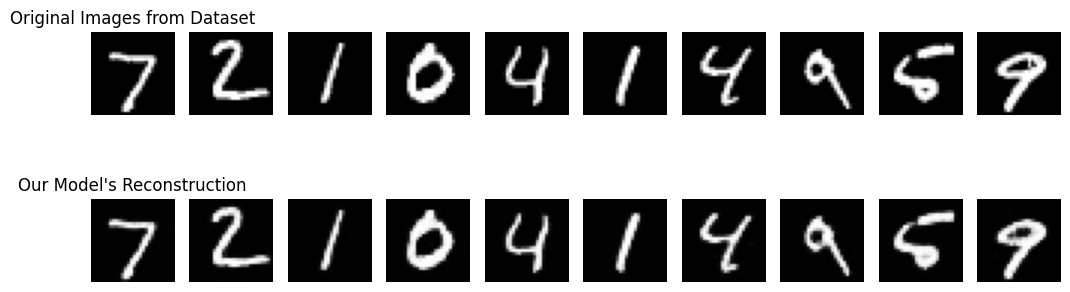

In [15]:
# Visualize the reconstruction
model = models["CAE_Model 3"]

model.eval()
dataiter = iter(test_loader)
images, _ = next(dataiter)
outputs = model(images)
    
# Display original and reconstructed images
fig, axes = plt.subplots(2, 10, figsize=(10, 4))  

axes[0, 0].set_title("Original Images from Dataset", fontsize=12)
axes[1, 0].set_title("Our Model's Reconstruction", fontsize=12)

for i in range(10):
    # Original images
    axes[0, i].imshow(images[i].squeeze(), cmap='gray')
    axes[0, i].axis('off')
    
    # Reconstructed images
    axes[1, i].imshow(outputs[i].detach().squeeze(), cmap='gray')
    axes[1, i].axis('off')

plt.tight_layout()
plt.show()

<b>QUESTION 2(b)</b>

In [16]:
from sklearn.manifold import TSNE
import numpy as np

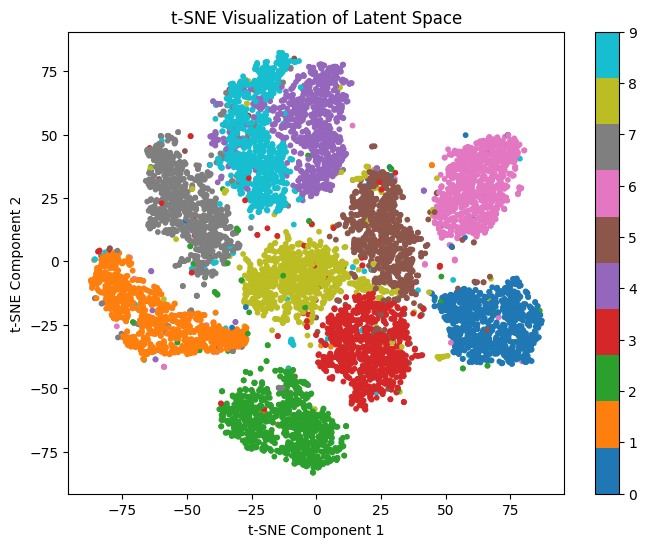

In [26]:
model = models["CAE_Model 3"]
encoder = model.encoder  
model.eval()  
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

latent_space = []
labels = []

with torch.no_grad():
    for data, target in test_loader:
        data = data.to(device)
        encoded_data = encoder(data)
        latent_space.append(encoded_data.view(encoded_data.size(0), -1).cpu().numpy())
        labels.append(target.cpu().numpy())

# Convert the list of latent space and labels to numpy arrays
latent_space = np.concatenate(latent_space, axis=0)
labels = np.concatenate(labels, axis=0)

# Apply t-SNE to the latent space (default perplexity: 30)
tsne = TSNE(n_components=2, random_state=42, perplexity=30)
latent_2d = tsne.fit_transform(latent_space)

# Create a scatter plot of the t-SNE result
plt.figure(figsize=(8, 6))
plt.scatter(latent_2d[:, 0], latent_2d[:, 1], c=labels, cmap='tab10', s=10)
plt.colorbar()
plt.title('t-SNE Visualization of Latent Space')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.show()


<b>QUESTION 2(c)</b>

In [42]:

def add_noise(images, noise_level):
    """Add Gaussian noise to images."""
    noise = torch.randn_like(images) * (noise_level/255)
    noisy_images = images + noise
    return noisy_images.clamp(0., 1.)

def train_denoising_model(noise_level, train_loader, epochs=10, device='cpu'):
    model = CAE_Model1().to(device)
    optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)
    criterion = torch.nn.MSELoss()

    for epoch in range(epochs):
        model.train()
        running_loss = 0.0
        for data, target in train_loader:
            noisy_data = add_noise(data, noise_level).to(device)  # Add noise
            target = target.to(device)  
            
            optimizer.zero_grad()
            output = model(noisy_data)
            
            loss = criterion(output, data.to(device))  
            loss.backward()
            optimizer.step()
            
            running_loss += loss.item()
        if ((epoch+1)%5==0):
            print(f"Epoch {epoch+1}/{epochs}, Noise Level {noise_level}, Loss: {running_loss/len(train_loader)}")
    return model


In [43]:
noise_levels = [1, 5, 10, 15]
trained_models = {}

# Train a separate model for each noise level
for noise_level in noise_levels:
    print(f"Training model for noise level: {noise_level}")
    model = train_denoising_model(noise_level, train_loader, epochs=10, device=device)
    trained_models[noise_level] = model


Training model for noise level: 1
Epoch 5/10, Noise Level 1, Loss: 0.002609415237468157
Epoch 10/10, Noise Level 1, Loss: 0.0019640622048406426
Training model for noise level: 5
Epoch 5/10, Noise Level 5, Loss: 0.0024190219968104605
Epoch 10/10, Noise Level 5, Loss: 0.0019194057639708112
Training model for noise level: 10
Epoch 5/10, Noise Level 10, Loss: 0.0025197419904863464
Epoch 10/10, Noise Level 10, Loss: 0.002034283784488196
Training model for noise level: 15
Epoch 5/10, Noise Level 15, Loss: 0.0029286673483150854
Epoch 10/10, Noise Level 15, Loss: 0.0022822077135875155


In [50]:
def show_noisy_and_denoised_for_all_models(trained_models, noise_levels, data_loader):
    
    for noise_level in noise_levels:
        model = trained_models[noise_level]
        model.eval()
        with torch.no_grad():
            for data, target in data_loader:
                noisy_data = add_noise(data, noise_level).to(device)
                denoised = model(noisy_data).cpu().numpy()

                original = data[0].cpu().numpy().squeeze()
                noisy = noisy_data[0].cpu().numpy().squeeze()
                denoised = denoised[0].squeeze()

                # Plot noisy and denoised images
                fig, axes = plt.subplots(1, 3, figsize=(9, 3))
                axes[0].imshow(original, cmap='gray')
                axes[0].set_title("Original Image")
                axes[1].imshow(noisy, cmap='gray')
                axes[1].set_title(f"Noisy Image (σ={noise_level})")
                axes[2].imshow(denoised, cmap='gray')
                axes[2].set_title("Denoised Image")

                for ax in axes:
                    ax.axis("off")

                plt.show()
                break  


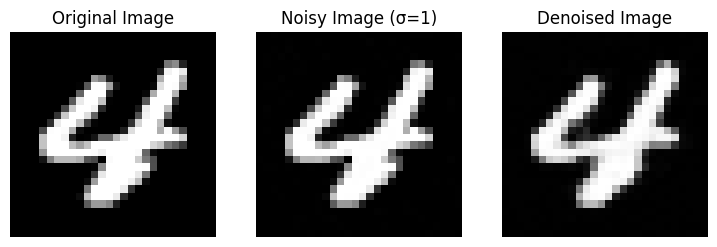

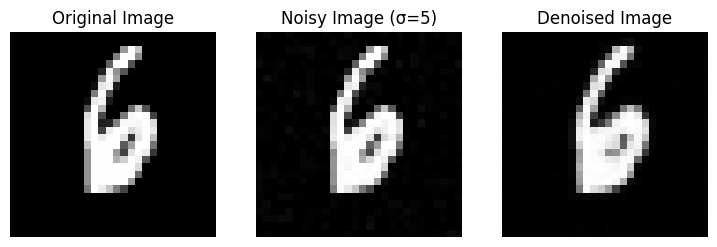

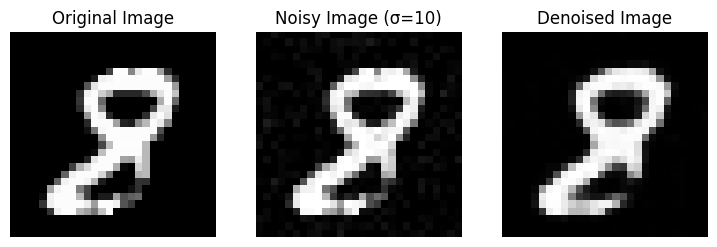

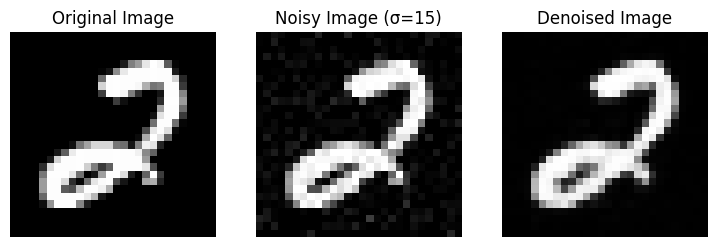

In [63]:
# Show noisy vs denoised images for all noise levels
show_noisy_and_denoised_for_all_models(trained_models, noise_levels, train_loader)

In [52]:
import cv2

def psnr(target, output):
    target = target.numpy().squeeze()
    output = output.numpy().squeeze()
    
    # Calculate PSNR between target and output
    mse = np.mean((target - output) ** 2)
    if mse == 0:
        return 100
    PIXEL_MAX = 1.0
    return 20 * np.log10(PIXEL_MAX / np.sqrt(mse))


In [57]:
from skimage.metrics import structural_similarity as ssim

def compute_ssim(target, output):
    target = target.numpy().squeeze()
    output = output.numpy().squeeze()
    data_range = target.max() - target.min()
    return ssim(target, output, data_range=data_range)


In [55]:
def evaluate_models(trained_models, noise_levels, data_loader):
    for noise_level in noise_levels:
        model = trained_models[noise_level]
        psnr_values = []
        ssim_values = []
        
        model.eval()
        with torch.no_grad():
            for data, target in data_loader:
                noisy_data = add_noise(data, noise_level).to(device)
                denoised = model(noisy_data).cpu()

                # Compute PSNR and SSIM
                psnr_value = psnr(data, denoised)
                ssim_value = compute_ssim(data, denoised)
                
                psnr_values.append(psnr_value)
                ssim_values.append(ssim_value)

        print(f"Noise Level: {noise_level}, Average PSNR: {np.mean(psnr_values)}, Average SSIM: {np.mean(ssim_values)}")


In [58]:
# Evaluate the models using PSNR and SSIM
evaluate_models(trained_models, noise_levels, train_loader)

Noise Level: 1, Average PSNR: 27.20251095187273, Average SSIM: 0.9780647208977832
Noise Level: 5, Average PSNR: 27.248415309672858, Average SSIM: 0.9798631382745068
Noise Level: 10, Average PSNR: 27.058674966134774, Average SSIM: 0.9813603793624304
Noise Level: 15, Average PSNR: 26.47105904151176, Average SSIM: 0.972382806401867


Average PSNR value close to 30 dB and SSIM > 0.90 suggest that the denoising closely resembles the input image.

<b>QUESTION 2(d)</b>

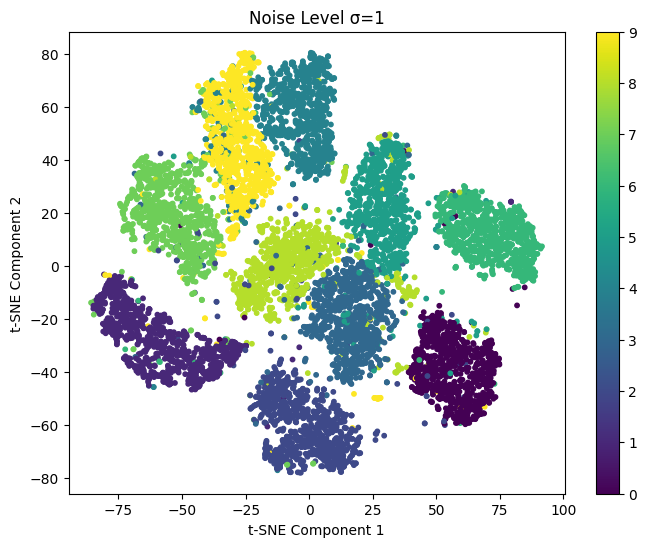

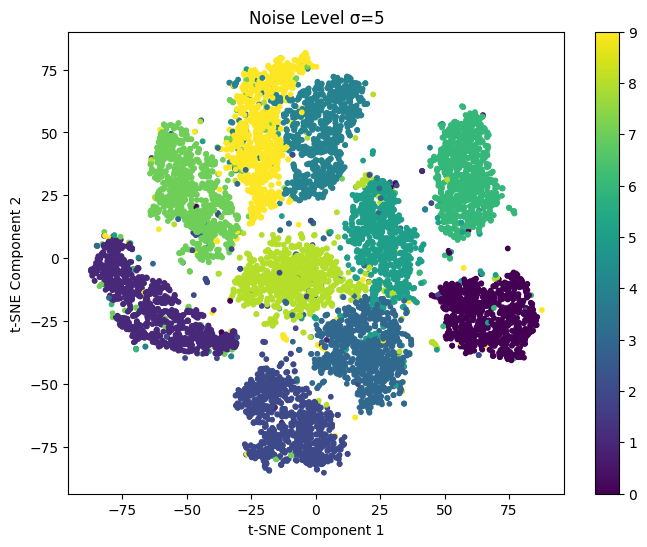

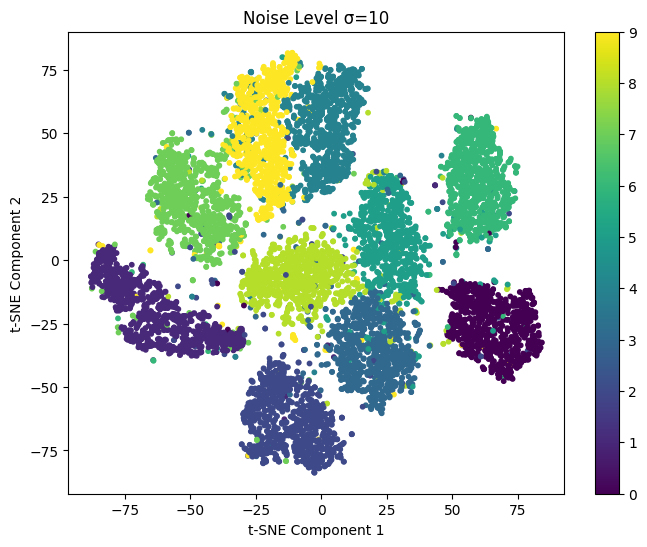

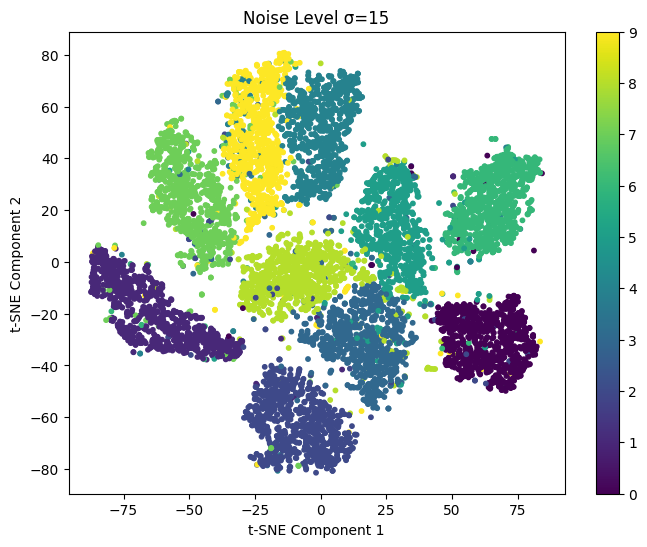

In [70]:

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

def plot_tsne_for_multiple_models(models, dataloader, noise_levels, device):
    
    latent_space = []
    labels = []

    for noise_level in noise_levels:
        latent_space = []
        labels = []
        with torch.no_grad():
            model = trained_models[noise_level]
            encoder = model.encoder
            model.eval()
            for data, target in dataloader:
                data = data.to(device)
                encoded_data = encoder(data)
                latent_space.append(encoded_data.view(encoded_data.size(0), -1).cpu().numpy())
                labels.append(target.cpu().numpy())
            
            # Convert the list of latent space and labels to numpy arrays
            latent_space = np.concatenate(latent_space, axis=0)
            labels = np.concatenate(labels, axis=0)

            # Apply t-SNE to the latent space (default perplexity: 30)
            tsne = TSNE(n_components=2, random_state=42, perplexity=30)
            latent_2d = tsne.fit_transform(latent_space)
    
            
            # Plotting t-SNE results
            plt.figure(figsize=(8, 6))
            scatter = plt.scatter(latent_2d[:, 0], latent_2d[:, 1], c=labels, cmap='viridis', s=10)
            plt.colorbar()
            plt.title(f"Noise Level σ={noise_level}")
            plt.xlabel("t-SNE Component 1")
            plt.ylabel("t-SNE Component 2")
            plt.show()

# Example usage:
plot_tsne_for_multiple_models(trained_models,dataloader=test_loader, noise_levels=noise_levels, device=device)

We can see that as the noise level increases, the denoising CAE’s latent representations become more spread out in the t-SNE plot, reflecting the increasing difficulty in denoising. However, they still retain some structure near the clean latent representations.
<br>
The vanilla CAE has well-separated clusters, with clean inputs clustered tightly and noisy inputs dispersed far apart. It shows more distinct separation between clean and noisy data, as it does not learn to handle noise.